In [110]:
#different seeds for bumped and unbumped

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils import black_scholes, MC_option_pricer, european_binomial_tree

# Apply the default theme
sns.set_theme()

stock_price_T0 = 100
T = 1
r = 0.06
strike_price = 99
#volatility
sigma = 0.2
#steps of the stock
#steps = 10

#different paths to see when it converges
n_paths = np.array([10000, 100000, 200000])
seed = 'No'

#for binomial tree
N = 50
option_type = 'Call'

epsilons = np.arange(0,0.1,0.01)

price_P_MCs = []
std_MCs1 = []
for paths in n_paths:
    print(paths)
    for epsilon in epsilons:
        print('Stock price:', stock_price_T0 + epsilon)
        price_P_MC = MC_option_pricer.callMCPricer(stock_price_T0+epsilon,strike_price,sigma ,T,r,paths, seed)
        #price_P_MC = MC_option_pricer_with_GBM.callMCPricer(stock_price_T0+epsilon,strike_price,sigma ,T,r,paths, steps, seed)
        #print('MC option price: ', price_P_MC[0], 'standard error', price_P_MC[1])
        price_P_MCs.append(price_P_MC[0])
        std_MCs1.append(price_P_MC[1])


price_P_MCs=np.array(price_P_MCs)
price_P_MCs = np.reshape(price_P_MCs,(len(n_paths), len(epsilons)))

std_MCs1 = np.array(std_MCs1)
std_MCs1 = np.reshape(std_MCs1,(len(n_paths), len(epsilons)))


deltasMC1 = np.array([])
deltasBS = np.array([])
deltasBT = np.array([])
std_deltas1 = np.array([])

for i in range(price_P_MCs.shape[0]):
    for j in range(price_P_MCs.shape[1]-1):
        #to calculate the delta with MC for the different epsilons
        delta_MC1 = (price_P_MCs[i][j+1]-price_P_MCs[i,0])/epsilons[j+1]
        deltasMC1= np.append(deltasMC1,delta_MC1)
        
        std_delta1 = std_MCs1[i][j+1]+std_MCs1[i,0]
        std_deltas1 = np.append(std_deltas1,std_delta1)
        #to calculate the delta with the BS for the different epsilons
        BS = black_scholes.callBlackScholes(stock_price_T0,T,r,strike_price,sigma)
        delta_BS = BS[1]
        deltasBS = np.append(deltasBS, delta_BS)
        
        #to calculate the delta with the binomial tree for the different epsilons
        tree = european_binomial_tree.buildTree(stock_price_T0, sigma, T, N)
        val_bin=european_binomial_tree.valueEuropeanOptionMatrix(tree, T, r, strike_price,N, sigma, option_type)
        delta_BT = (val_bin[1][1]-val_bin[1][0])/(tree[1][1]-tree[1][0])
        deltasBT = np.append(deltasBT, delta_BT)

#relative error MC compared to analytical
rel_err1 = abs(deltasMC1-deltasBS)/deltasBS    

rel_err1 = np.array(rel_err1)
rel_err1 = np.reshape(rel_err1,(len(n_paths), len(epsilons)-1))

#relative error BT compared to analytical
rel_err2 = abs(deltasBT -deltasBS)/deltasBS    

rel_err2 =np.array(rel_err2)
rel_err2 = np.reshape(rel_err2,(len(n_paths), len(epsilons)-1))


10000
Stock price: 100.0
Stock price: 100.01
Stock price: 100.02
Stock price: 100.03
Stock price: 100.04
Stock price: 100.05
Stock price: 100.06
Stock price: 100.07
Stock price: 100.08
Stock price: 100.09
100000
Stock price: 100.0
Stock price: 100.01
Stock price: 100.02
Stock price: 100.03
Stock price: 100.04
Stock price: 100.05
Stock price: 100.06
Stock price: 100.07
Stock price: 100.08
Stock price: 100.09
200000
Stock price: 100.0
Stock price: 100.01
Stock price: 100.02
Stock price: 100.03
Stock price: 100.04
Stock price: 100.05
Stock price: 100.06
Stock price: 100.07
Stock price: 100.08
Stock price: 100.09


[[0.30855088 0.31052621 0.3120735  0.30743525 0.31081031 0.30798285
  0.30799873 0.30933148 0.30941867]
 [0.09693938 0.09671699 0.09703711 0.09673543 0.09668645 0.09675512
  0.09704734 0.09672176 0.09675006]
 [0.06825667 0.06827944 0.06845685 0.0684516  0.0683231  0.06840525
  0.06834904 0.0682507  0.0682821 ]]


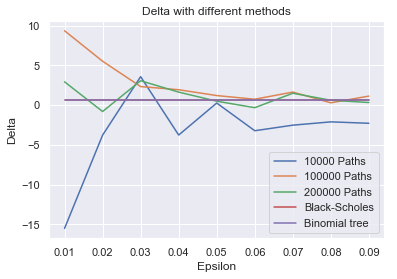

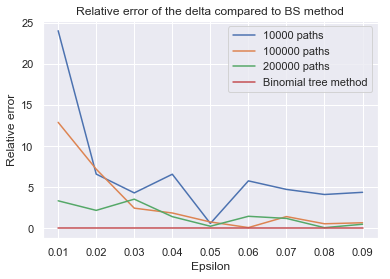

In [115]:
#different seeds for bumped and unbumped
#relative error between MC and BS, BT and BN
#for MC different number paths were used to test if more paths mean that we get a delta that is close the analytical value
deltasMC1 = np.reshape(deltasMC1,(len(n_paths), len(epsilons)-1))
#deltaMC1_paths_std = np.std(deltasMC1, axis=1)
std_deltas1 = np.reshape(std_deltas1,(len(n_paths), len(epsilons)-1))

print(std_deltas1)

plt.plot(epsilons[1:len(epsilons)],deltasMC1[0], label='10000 Paths')
plt.plot(epsilons[1:len(epsilons)],deltasMC1[1], label='100000 Paths')
plt.plot(epsilons[1:len(epsilons)],deltasMC1[2], label='200000 Paths')
plt.plot(epsilons[1:len(epsilons)],deltasBS[0:9],label='Black-Scholes')
plt.plot(epsilons[1:len(epsilons)],deltasBT[0:9],label='Binomial tree')
plt.title('Delta with different methods')
plt.xlabel('Epsilon')
plt.ylabel('Delta')
plt.legend()
plt.show()

plt.plot(epsilons[1:len(epsilons)],rel_err1[0],label='10000 paths')
plt.plot(epsilons[1:len(epsilons)],rel_err1[1],label='100000 paths')
plt.plot(epsilons[1:len(epsilons)],rel_err1[2], label='200000 paths')
plt.plot(epsilons[1:len(epsilons)],rel_err2[0], label='Binomial tree method')
plt.title('Relative error of the delta compared to BS method')
plt.xlabel('Epsilon')
plt.ylabel('Relative error')
plt.legend()
plt.show()


In [113]:
#different seeds for bumped and unbumped

seed = 'Yes'

price_P_MCs = []
std_MCs2 = []
for paths in n_paths:
    print(paths)
    for epsilon in epsilons:
        print('Stock price:', stock_price_T0 + epsilon)
        price_P_MC = MC_option_pricer.callMCPricer(stock_price_T0+epsilon,strike_price,sigma ,T,r,paths, seed)
        #price_P_MC = MC_option_pricer_with_GBM.callMCPricer(stock_price_T0+epsilon,strike_price,sigma ,T,r,paths, steps, seed)
        #print('MC option price: ', price_P_MC[0], 'standard error', price_P_MC[1])
        price_P_MCs.append(price_P_MC[0])
        std_MCs2.append(price_P_MC[1])


price_P_MCs=np.array(price_P_MCs)
price_P_MCs = np.reshape(price_P_MCs,(len(n_paths), len(epsilons)))

std_MCs2 = np.array(std_MCs2)
std_MCs2 = np.reshape(std_MCs2,(len(n_paths), len(epsilons)))


deltasMC2 = np.array([])
deltasBS = np.array([])
deltasBT = np.array([])
std_deltas2 = np.array([])

for i in range(price_P_MCs.shape[0]):
    for j in range(price_P_MCs.shape[1]-1):
        #to calculate the delta with MC for the different epsilons
        delta_MC2 = (price_P_MCs[i][j+1]-price_P_MCs[i,0])/epsilons[j+1]
        deltasMC2= np.append(deltasMC2,delta_MC2)
        
        std_delta2 = std_MCs2[i][j+1]+std_MCs2[i,0]
        std_deltas2 = np.append(std_deltas2,std_delta2)
        #to calculate the delta with the BS for the different epsilons
        BS = black_scholes.callBlackScholes(stock_price_T0,T,r,strike_price,sigma)
        delta_BS = BS[1]
        deltasBS = np.append(deltasBS, delta_BS)
        
        #to calculate the delta with the binomial tree for the different epsilons
        tree = european_binomial_tree.buildTree(stock_price_T0, sigma, T, N)
        val_bin=european_binomial_tree.valueEuropeanOptionMatrix(tree, T, r, strike_price,N, sigma, option_type)
        delta_BT = (val_bin[1][1]-val_bin[1][0])/(tree[1][1]-tree[1][0])
        deltasBT = np.append(deltasBT, delta_BT)

#percentage relative error MC compared to analytical
rel_err3 = abs(deltasMC2-deltasBS)/deltasBS   

rel_err3 = np.array(rel_err3)
rel_err3 = np.reshape(rel_err3,(len(n_paths), len(epsilons)-1))

#relative error BT compared to analytical
rel_err4 = abs(deltasBT -deltasBS)/deltasBS  

rel_err4 =np.array(rel_err4)
rel_err4 = np.reshape(rel_err4,(len(n_paths), len(epsilons)-1))


10000
Stock price: 100.0
Stock price: 100.01
Stock price: 100.02
Stock price: 100.03
Stock price: 100.04
Stock price: 100.05
Stock price: 100.06
Stock price: 100.07
Stock price: 100.08
Stock price: 100.09
100000
Stock price: 100.0
Stock price: 100.01
Stock price: 100.02
Stock price: 100.03
Stock price: 100.04
Stock price: 100.05
Stock price: 100.06
Stock price: 100.07
Stock price: 100.08
Stock price: 100.09
200000
Stock price: 100.0
Stock price: 100.01
Stock price: 100.02
Stock price: 100.03
Stock price: 100.04
Stock price: 100.05
Stock price: 100.06
Stock price: 100.07
Stock price: 100.08
Stock price: 100.09


[0.6665561  0.66666614 0.66679074 0.66689294 0.66697789 0.66706398
 0.66713789 0.66719333 0.66725182]


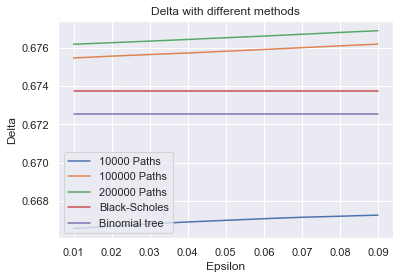

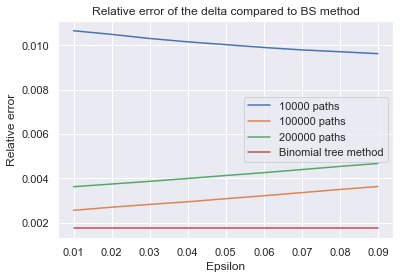

In [116]:
#different seeds for bumped and unbumped
#relative error between MC and BS, BT and BN
#for MC different number paths were used to test if more paths mean that we get a delta that is close the analytical value
deltasMC2 = np.reshape(deltasMC2,(len(n_paths), len(epsilons)-1))
#deltaMC1_paths_std = np.std(deltasMC1, axis=1)
std_deltas2 = np.reshape(std_deltas2,(len(n_paths), len(epsilons)-1))

print(deltasMC2[0])
plt.plot(epsilons[1:len(epsilons)],deltasMC2[0],label='10000 Paths')
plt.plot(epsilons[1:len(epsilons)],deltasMC2[1], label='100000 Paths')
plt.plot(epsilons[1:len(epsilons)],deltasMC2[2],label='200000 Paths')
plt.plot(epsilons[1:len(epsilons)],deltasBS[0:9],label='Black-Scholes')
plt.plot(epsilons[1:len(epsilons)],deltasBT[0:9],label='Binomial tree')
plt.title('Delta with different methods')
plt.xlabel('Epsilon')
plt.ylabel('Delta')
plt.legend()
plt.show()

plt.plot(epsilons[1:len(epsilons)],rel_err3[0],label='10000 paths')
plt.plot(epsilons[1:len(epsilons)],rel_err3[1],label='100000 paths')
plt.plot(epsilons[1:len(epsilons)],rel_err3[2], label='200000 paths')
plt.plot(epsilons[1:len(epsilons)],rel_err4[0], label='Binomial tree method')
plt.title('Relative error of the delta compared to BS method')
plt.xlabel('Epsilon')
plt.ylabel('Relative error')
plt.legend()
plt.show()


In [9]:
#estimation of delta with the best epsilon and best amount of paths
from utils import MC_calculation_final_delta,black_scholes, european_binomial_tree
import numpy as np

stock_price_T0 = 100
T = 1
r = 0.06
strike_price = 99
#volatility
sigma = 0.2
N=50
option_type = 'Call'

#best amount of paths
n_paths = 100000
#best epsilon
epsilons = np.array([0.0, 0.01])
sims = 100

price_P_MCs3 = []
std_MCs3 = []


for i in range(sims):
    print(i)
    seed=i
    for epsilon in epsilons:
        price_P_MC = MC_calculation_final_delta.callMCPricer(stock_price_T0+epsilon,strike_price,sigma ,T,r,n_paths, seed)
        price_P_MCs3.append(price_P_MC[0])
        std_MCs3.append(price_P_MC[1])


price_P_MCs3 = np.array(price_P_MCs3)
price_P_MCs3 = np.reshape(price_P_MCs3,(sims, len(epsilons)))
#print(price_P_MCs3)


std_MCs3 = np.array(std_MCs3)


deltasMC3 = np.array([])


for i in range(sims):
    #to calculate the delta with MC for the different epsilons
    delta_MC3 = (price_P_MCs3[i][1]-price_P_MCs3[i][0])/epsilons[1]
    deltasMC3 = np.append(deltasMC3,delta_MC3)
    
print(np.std(deltasMC3))

#to calculate the delta with the BS
BS = black_scholes.callBlackScholes(stock_price_T0,T,r,strike_price,sigma)
delta_BS = BS[1]

#to calculate the delta with the binomial tree
tree = european_binomial_tree.buildTree(stock_price_T0, sigma, T, N)
val_bin=european_binomial_tree.valueEuropeanOptionMatrix(tree, T, r, strike_price,N, sigma, option_type)
delta_BT = (val_bin[1][1]-val_bin[1][0])/(tree[1][1]-tree[1][0])

mean_delta = np.mean(deltasMC3)
std_err = np.std(deltasMC3)/np.sqrt(sims)
print('MC approximation delta: ',mean_delta, 'Std err: ',std_err)
print('Binomial tree delta: ',delta_BT)
print('Black-Scholes delta: ',delta_BS)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
0.0018264860574994997
MC approximation delta:  0.6738335904095579 Std err:  0.00018264860574994997
Binomial tree delta:  0.6725569646047751
Black-Scholes delta:  0.6737355117348961
